In [206]:
# Model output is coming out to be 0 for all the inputs.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [207]:
df = pd.read_csv('csse_covid_19_daily_reports_us.csv')
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [208]:
# dropping insignificant columns
df.drop(['Province_State','Country_Region','Last_Update','Lat','Long_'],axis=1,inplace=True)

In [209]:
from sklearn.preprocessing import LabelEncoder

In [210]:
le = LabelEncoder()
df['ISO3'] = le.fit_transform(df['ISO3'])

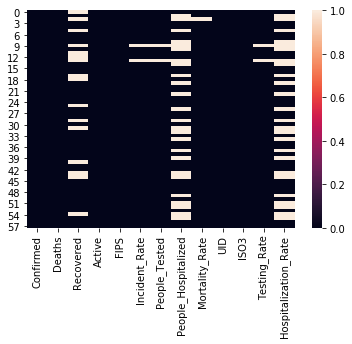

In [211]:
# null values present
sns.heatmap(df.isna())

In [212]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='median')
# df['Incident_Rate'] = si.fit_transform(df['Incident_Rate'].values.reshape(-1,1))
# df['People_Tested'] = si.fit_transform(df['People_Tested'].values.reshape(-1,1))
df['People_Hospitalized'] = si.fit_transform(df['People_Hospitalized'].values.reshape(-1,1))

In [213]:
# dropping null values in columns
df['Incident_Rate'].dropna(inplace=True)
df['People_Tested'].dropna(inplace=True)

In [214]:
# using the formulas to fill the null values
df['Recovered'] = df['Recovered'].replace(np.nan,(df['Confirmed']-df['Active']-df['Deaths']))
df['Mortality_Rate'] = df['Mortality_Rate'].replace(np.nan,(df['Deaths']*100/df['Confirmed']))
df['Hospitalization_Rate'] = df['Hospitalization_Rate'].replace(np.nan,(df['People_Hospitalized']/df['Confirmed']))

In [215]:
df.dropna(inplace=True)
df

,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,13052,522,0.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,4,3353.942386,11.438860
1,401,10,352.0,39.0,2,54.815493,37045.0,1493.0,2.493766,84000002,4,5063.940017,3.723192
3,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,4,2272.859351,12.022005
4,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,4,3189.670370,10.693584
5,85997,3497,0.0,82500.0,6,217.646575,1380120.0,1493.0,4.066421,84000006,4,3492.893832,0.017361
6,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,4,2289.339188,17.348774
7,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,4,5349.302875,28.054438
8,8194,310,3965.0,3919.0,10,841.476990,45412.0,1493.0,3.783256,84000010,4,4663.552976,0.182206
10,7551,407,1059.0,6085.0,11,1069.927127,40419.0,1493.0,5.390015,84000011,4,5727.106946,0.197722
11,47471,2096,0.0,45375.0,12,221.024217,771348.0,8934.0,4.415327,84000012,4,3591.383953,18.819911


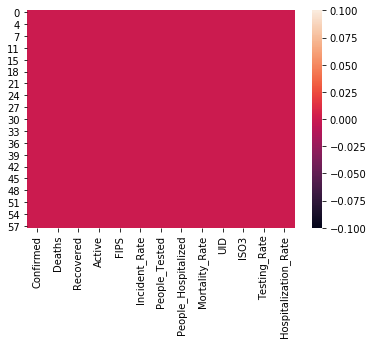

In [216]:
sns.heatmap(df.isna())

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 57
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Confirmed             55 non-null     int64  
 1   Deaths                55 non-null     int64  
 2   Recovered             55 non-null     float64
 3   Active                55 non-null     float64
 4   FIPS                  55 non-null     int64  
 5   Incident_Rate         55 non-null     float64
 6   People_Tested         55 non-null     float64
 7   People_Hospitalized   55 non-null     float64
 8   Mortality_Rate        55 non-null     float64
 9   UID                   55 non-null     int64  
 10  ISO3                  55 non-null     int32  
 11  Testing_Rate          55 non-null     float64
 12  Hospitalization_Rate  55 non-null     float64
dtypes: float64(8), int32(1), int64(4)
memory usage: 5.8 KB


In [218]:
df.describe()

,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,5.500000e+01,55.000000,55.000000,5.500000e+01,55.000000,55.000000,55.000000
mean,28212.745455,1698.836364,5351.127273,21162.781818,32.036364,403.435002,2.299576e+05,3535.672727,4.567409,7.789098e+07,3.909091,3960.938317,10.613949
std,53614.101223,4178.550115,10607.048455,42148.607793,18.878720,402.735419,2.999399e+05,10288.916518,2.074273,2.201472e+07,0.518999,1884.729897,11.419585
min,21.000000,2.000000,0.000000,2.000000,1.000000,38.082112,1.383000e+03,65.000000,1.101269,3.160000e+02,1.000000,97.702058,0.009902
25%,3834.500000,98.500000,37.000000,1076.000000,17.500000,158.533760,4.859600e+04,1291.500000,3.256718,8.400001e+07,4.000000,2752.080259,0.199903
50%,11528.000000,407.000000,1275.000000,6324.000000,31.000000,251.824349,1.422460e+05,1493.000000,4.415327,8.400003e+07,4.000000,3492.893832,9.901758
75%,31172.000000,1561.500000,4473.000000,19810.500000,45.500000,483.617754,2.817865e+05,1846.500000,5.508969,8.400004e+07,4.000000,4863.746497,16.235300
max,354370.000000,28636.000000,61886.000000,263848.000000,78.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.400006e+07,5.000000,11377.424693,71.095238


In [219]:
df.skew()

Confirmed               4.614978
Deaths                  5.361075
Recovered               3.556028
Active                  4.083998
FIPS                    0.370416
Incident_Rate           1.955029
People_Tested           2.769517
People_Hospitalized     6.831318
Mortality_Rate          0.591921
UID                    -3.383648
ISO3                   -4.260285
Testing_Rate            1.452496
Hospitalization_Rate    2.780664
dtype: float64

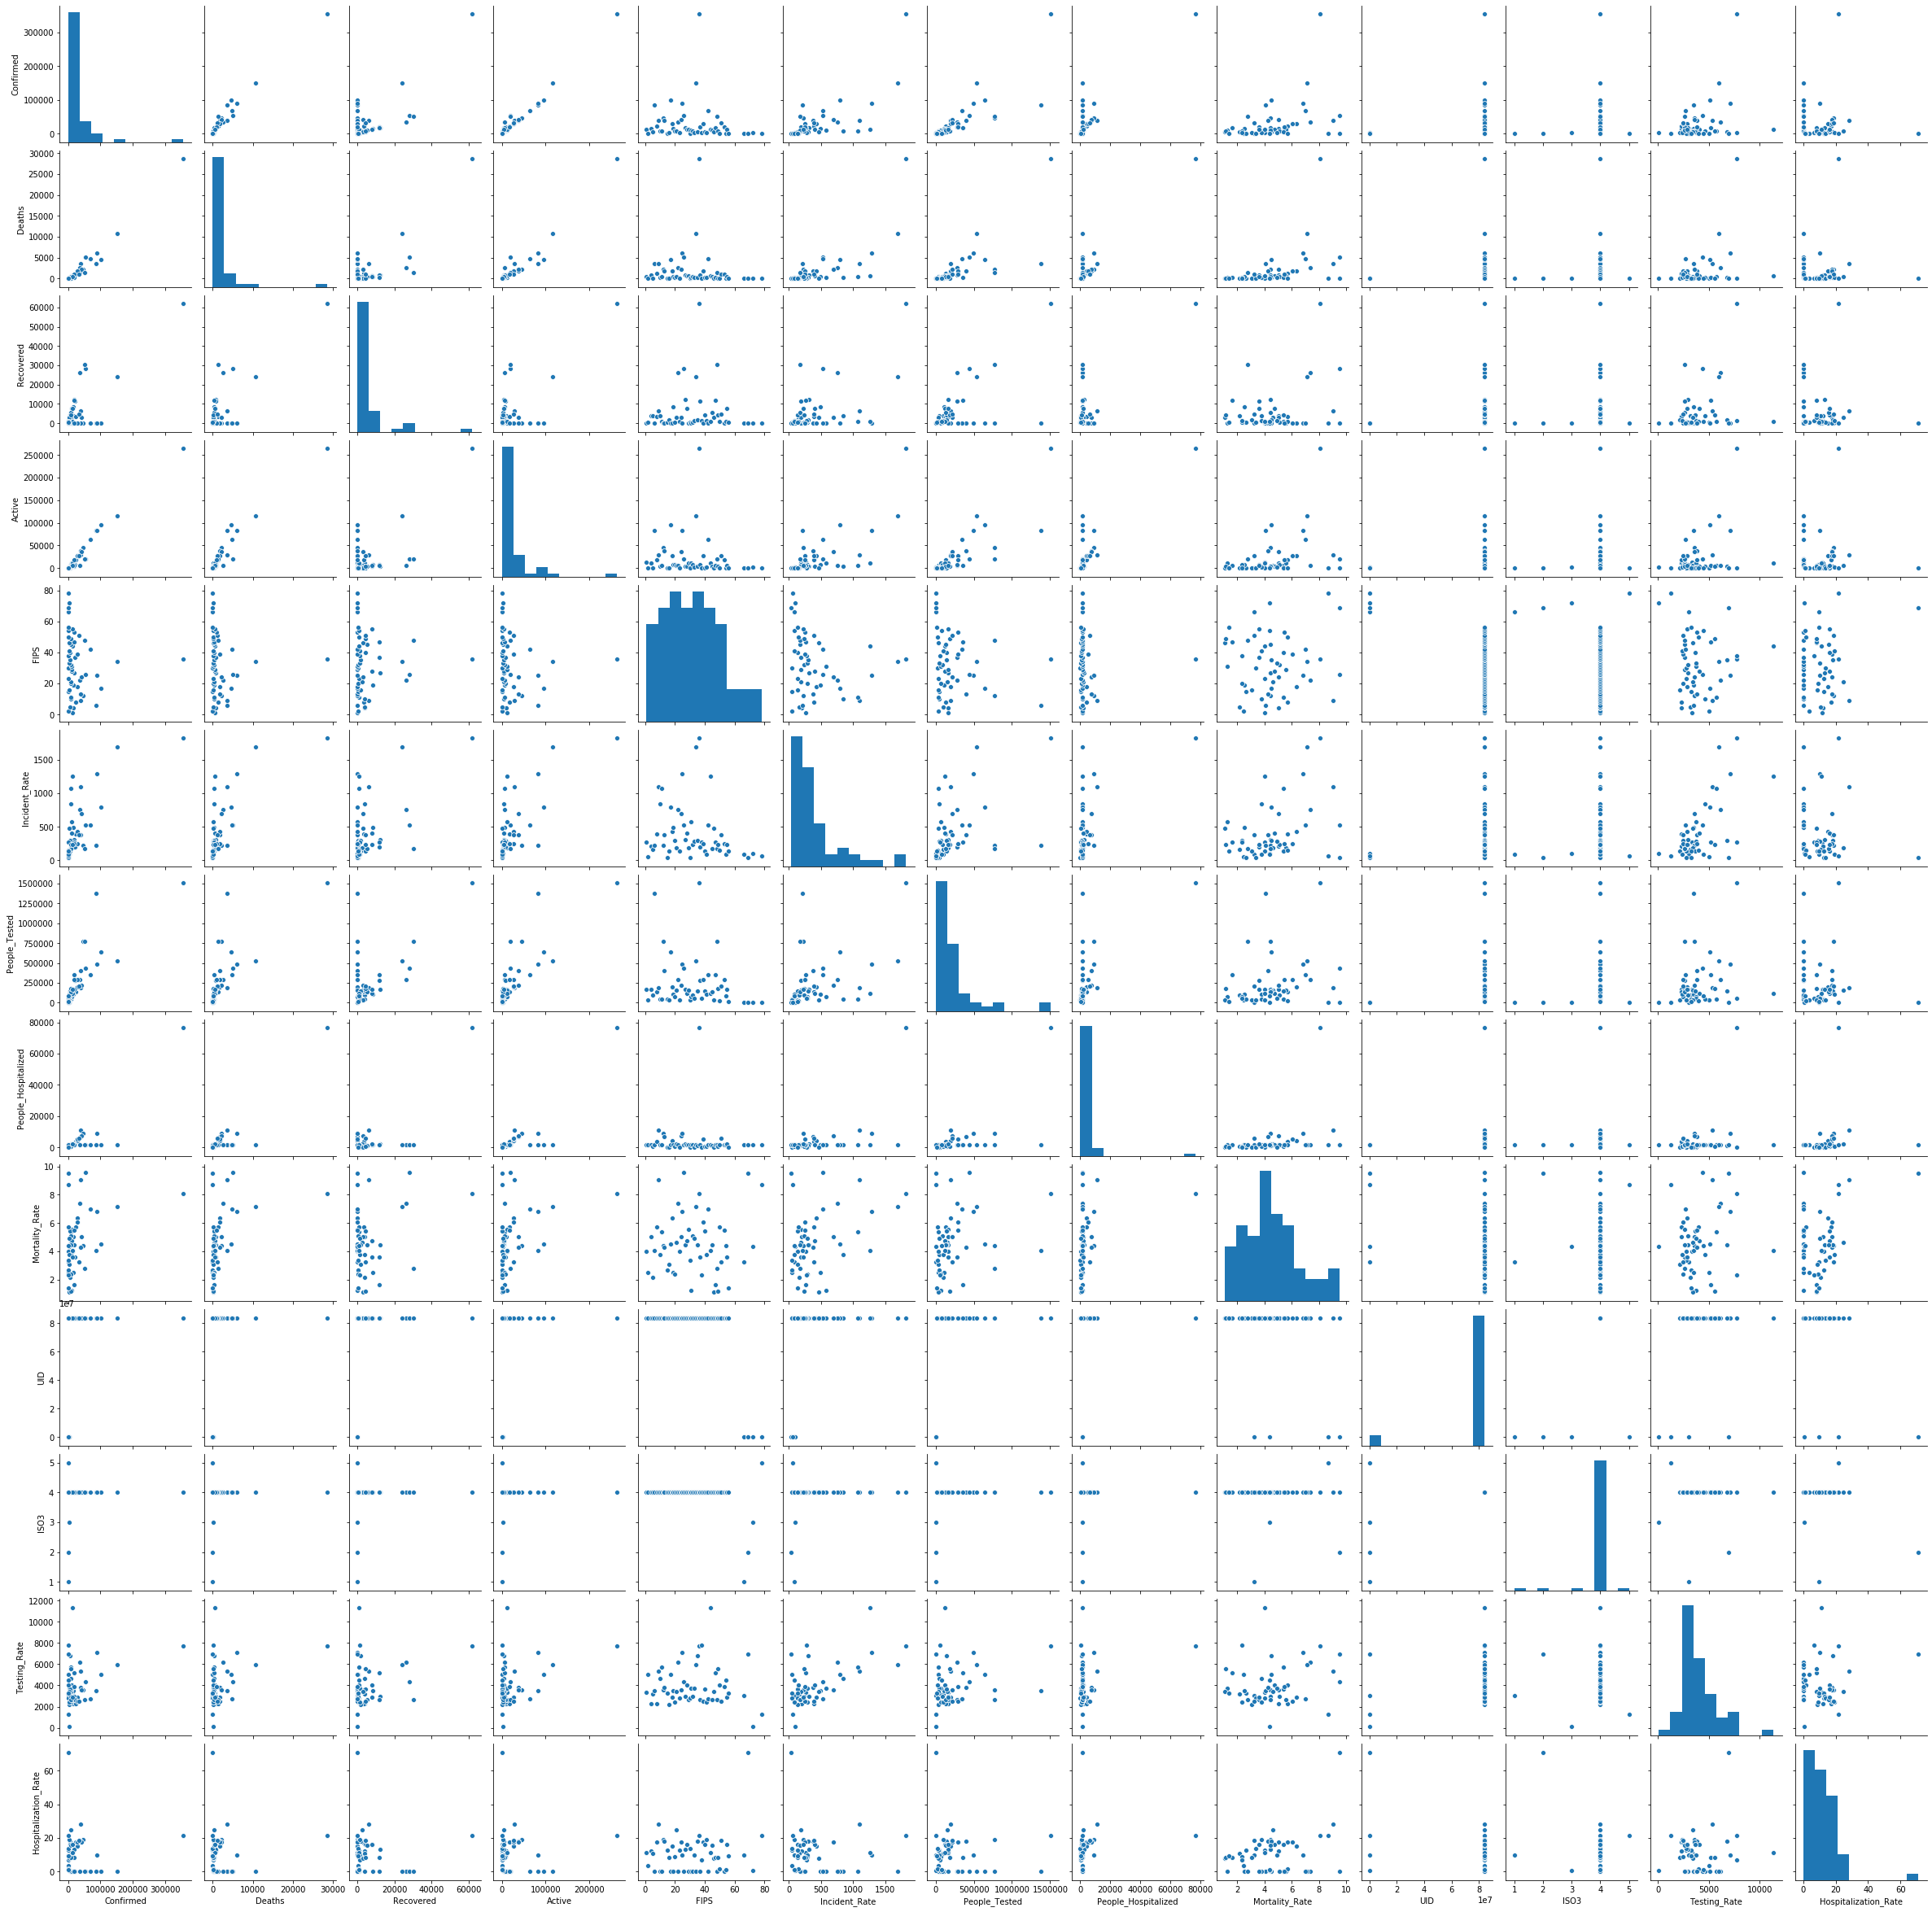

In [220]:
sns.pairplot(df)

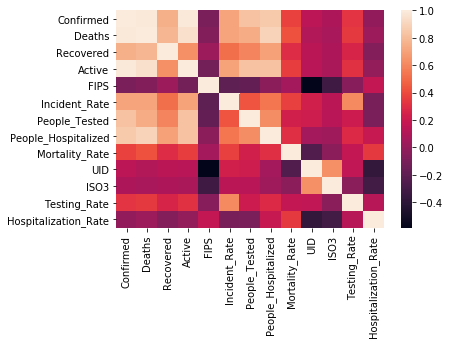

In [221]:
sns.heatmap(df.corr())

In [222]:
df.drop(['UID','ISO3','FIPS'],axis=1,inplace=True)

In [223]:
df

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,13052,522,0.0,12530.0,266.194321,164450.0,1493.0,3.999387,3353.942386,11.438860
1,401,10,352.0,39.0,54.815493,37045.0,1493.0,2.493766,5063.940017,3.723192
3,14906,747,3773.0,10386.0,204.788838,165435.0,1792.0,5.011405,2272.859351,12.022005
4,5003,107,3852.0,1044.0,165.782801,96258.0,535.0,2.138717,3189.670370,10.693584
5,85997,3497,0.0,82500.0,217.646575,1380120.0,1493.0,4.066421,3492.893832,0.017361
6,22797,1299,3478.0,18020.0,395.868121,131837.0,3955.0,5.698118,2289.339188,17.348774
7,39017,3529,6264.0,29224.0,1094.357902,190718.0,10946.0,9.044775,5349.302875,28.054438
8,8194,310,3965.0,3919.0,841.476990,45412.0,1493.0,3.783256,4663.552976,0.182206
10,7551,407,1059.0,6085.0,1069.927127,40419.0,1493.0,5.390015,5727.106946,0.197722
11,47471,2096,0.0,45375.0,221.024217,771348.0,8934.0,4.415327,3591.383953,18.819911


Confirmed                  AxesSubplot(0.125,0.749828;0.352273x0.130172)
Deaths                  AxesSubplot(0.547727,0.749828;0.352273x0.130172)
Recovered                  AxesSubplot(0.125,0.593621;0.352273x0.130172)
Active                  AxesSubplot(0.547727,0.593621;0.352273x0.130172)
Incident_Rate              AxesSubplot(0.125,0.437414;0.352273x0.130172)
People_Tested           AxesSubplot(0.547727,0.437414;0.352273x0.130172)
People_Hospitalized        AxesSubplot(0.125,0.281207;0.352273x0.130172)
Mortality_Rate          AxesSubplot(0.547727,0.281207;0.352273x0.130172)
Testing_Rate                  AxesSubplot(0.125,0.125;0.352273x0.130172)
Hospitalization_Rate       AxesSubplot(0.547727,0.125;0.352273x0.130172)
dtype: object

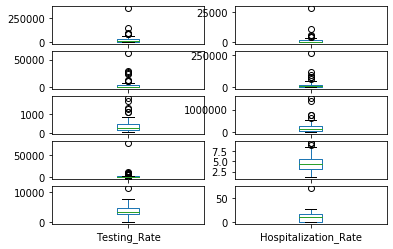

In [224]:
df.plot(kind='box',subplots=True,layout=(5,2))

In [225]:
from sklearn.preprocessing import StandardScaler

In [226]:
# scaling the data
ss = StandardScaler()
df1 = ss.fit_transform(df.drop('Confirmed',axis=1))
df1

array([[-2.84233281e-01, -5.09137625e-01, -2.06705482e-01,
        -3.43912139e-01, -2.20415338e-01, -2.00361194e-01,
        -2.76365615e-01, -3.25028261e-01,  7.29023341e-02],
       [-4.07893159e-01, -4.75646281e-01, -5.05793104e-01,
        -8.73607444e-01, -6.49098787e-01, -2.00361194e-01,
        -1.00891084e+00,  5.90624593e-01, -6.08977221e-01],
       [-2.29890562e-01, -1.50152282e-01, -2.58041954e-01,
        -4.97788457e-01, -2.17101079e-01, -1.71032954e-01,
         2.16021593e-01, -9.03916062e-01,  1.24438299e-01],
       [-3.84465408e-01, -1.42635759e-01, -4.81729133e-01,
        -5.95533889e-01, -4.49863019e-01, -2.94329269e-01,
        -1.18165632e+00, -4.12991039e-01,  7.03784417e-03],
       [ 4.34298231e-01, -5.09137625e-01,  1.46867366e+00,
        -4.65568188e-01,  3.86998621e+00, -2.00361194e-01,
        -2.43750957e-01, -2.50623897e-01, -9.36483587e-01],
       [-9.65697570e-02, -1.78220312e-01, -7.52515522e-02,
        -1.89618863e-02, -3.30149283e-01,  4.113087

In [227]:
df.columns

Index(['Confirmed', 'Deaths', 'Recovered', 'Active', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [229]:
df2 = pd.DataFrame(df1,columns=['Deaths', 'Recovered', 'Active', 'Incident_Rate','People_Tested', 'People_Hospitalized', 'Mortality_Rate','Testing_Rate', 'Hospitalization_Rate'])
df2

,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,-0.284233,-0.509138,-0.206705,-0.343912,-0.220415,-0.200361,-0.276366,-0.325028,0.072902
1,-0.407893,-0.475646,-0.505793,-0.873607,-0.649099,-0.200361,-1.008911,0.590625,-0.608977
2,-0.229891,-0.150152,-0.258042,-0.497788,-0.217101,-0.171033,0.216022,-0.903916,0.124438
3,-0.384465,-0.142636,-0.481729,-0.595534,-0.449863,-0.294329,-1.181656,-0.412991,0.007038
4,0.434298,-0.509138,1.468674,-0.465568,3.869986,-0.200361,-0.243751,-0.250624,-0.936484
5,-0.096570,-0.178220,-0.075252,-0.018962,-0.330149,0.041131,0.550135,-0.895092,0.595197
6,0.442027,0.086856,0.193020,1.731387,-0.132031,0.726862,2.178418,0.743428,1.541320
7,-0.335436,-0.131884,-0.412889,1.097692,-0.620946,-0.200361,-0.381522,0.376229,-0.921915
8,-0.312008,-0.408378,-0.361026,1.670166,-0.637746,-0.200361,0.400230,0.945731,-0.920544
9,0.095924,-0.509138,0.579743,-0.457104,1.821633,0.529510,-0.073994,-0.197885,0.725210


In [233]:
df.reset_index(inplace=True)

In [234]:
df.columns

Index(['index', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [235]:
df3 = pd.concat([df2,df['Confirmed']],axis=1)
df3

,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate,Confirmed
0,-0.284233,-0.509138,-0.206705,-0.343912,-0.220415,-0.200361,-0.276366,-0.325028,0.072902,13052
1,-0.407893,-0.475646,-0.505793,-0.873607,-0.649099,-0.200361,-1.008911,0.590625,-0.608977,401
2,-0.229891,-0.150152,-0.258042,-0.497788,-0.217101,-0.171033,0.216022,-0.903916,0.124438,14906
3,-0.384465,-0.142636,-0.481729,-0.595534,-0.449863,-0.294329,-1.181656,-0.412991,0.007038,5003
4,0.434298,-0.509138,1.468674,-0.465568,3.869986,-0.200361,-0.243751,-0.250624,-0.936484,85997
5,-0.096570,-0.178220,-0.075252,-0.018962,-0.330149,0.041131,0.550135,-0.895092,0.595197,22797
6,0.442027,0.086856,0.193020,1.731387,-0.132031,0.726862,2.178418,0.743428,1.541320,39017
7,-0.335436,-0.131884,-0.412889,1.097692,-0.620946,-0.200361,-0.381522,0.376229,-0.921915,8194
8,-0.312008,-0.408378,-0.361026,1.670166,-0.637746,-0.200361,0.400230,0.945731,-0.920544,7551
9,0.095924,-0.509138,0.579743,-0.457104,1.821633,0.529510,-0.073994,-0.197885,0.725210,47471


In [247]:
from sklearn.preprocessing import LabelEncoder

In [248]:
le = LabelEncoder()
df3['Confirmed'] = le.fit_transform(df3['Confirmed'])

In [249]:
df3

,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate,Confirmed
0,-0.284233,-0.509138,-0.206705,-0.343912,-0.220415,-0.200361,-0.276366,-0.325028,0.072902,29
1,-0.407893,-0.475646,-0.505793,-0.873607,-0.649099,-0.200361,-1.008911,0.590625,-0.608977,3
2,-0.229891,-0.150152,-0.258042,-0.497788,-0.217101,-0.171033,0.216022,-0.903916,0.124438,32
3,-0.384465,-0.142636,-0.481729,-0.595534,-0.449863,-0.294329,-1.181656,-0.412991,0.007038,16
4,0.434298,-0.509138,1.468674,-0.465568,3.869986,-0.200361,-0.243751,-0.250624,-0.936484,50
5,-0.096570,-0.178220,-0.075252,-0.018962,-0.330149,0.041131,0.550135,-0.895092,0.595197,38
6,0.442027,0.086856,0.193020,1.731387,-0.132031,0.726862,2.178418,0.743428,1.541320,43
7,-0.335436,-0.131884,-0.412889,1.097692,-0.620946,-0.200361,-0.381522,0.376229,-0.921915,23
8,-0.312008,-0.408378,-0.361026,1.670166,-0.637746,-0.200361,0.400230,0.945731,-0.920544,20
9,0.095924,-0.509138,0.579743,-0.457104,1.821633,0.529510,-0.073994,-0.197885,0.725210,46


In [250]:
X = df3.drop(['Confirmed'],axis=1)
y = df3['Confirmed']

In [251]:
from sklearn.model_selection import train_test_split

In [252]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [253]:
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier()]

In [254]:
import warnings
warnings.filterwarnings('ignore')
max_score=0
for r_state in range(42,101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=r_state)
    for m in model:    
        m.fit(X_train,y_train)
        pred = m.predict(X_test)
        a = accuracy_score(y_test,pred)
        print(r_state,a)
        if a>max_score:
            max_score = a
            final_r_state = r_state
print(final_r_state,max_score)

42 0.0
42 0.0
42 0.0
43 0.0
43 0.0
43 0.0
44 0.0
44 0.0
44 0.0
45 0.0
45 0.0
45 0.0
46 0.0
46 0.0
46 0.0
47 0.0
47 0.0
47 0.0
48 0.0
48 0.0
48 0.0
49 0.0
49 0.0
49 0.0
50 0.0
50 0.0
50 0.0
51 0.0
51 0.0
51 0.0
52 0.0
52 0.0
52 0.0
53 0.0
53 0.0
53 0.0
54 0.0
54 0.0
54 0.0
55 0.0
55 0.0
55 0.0
56 0.0
56 0.0
56 0.0
57 0.0
57 0.0
57 0.0
58 0.0
58 0.0
58 0.0
59 0.0
59 0.0
59 0.0
60 0.0
60 0.0
60 0.0
61 0.0
61 0.0
61 0.0
62 0.0
62 0.0
62 0.0
63 0.0
63 0.0
63 0.0
64 0.0
64 0.0
64 0.0
65 0.0
65 0.0
65 0.0
66 0.0
66 0.0
66 0.0
67 0.0
67 0.0
67 0.0
68 0.0
68 0.0
68 0.0
69 0.0
69 0.0
69 0.0
70 0.0
70 0.0
70 0.0
71 0.0
71 0.0
71 0.0
72 0.0
72 0.0
72 0.0
73 0.0
73 0.0
73 0.0
74 0.0
74 0.0
74 0.0
75 0.0
75 0.0
75 0.0
76 0.0
76 0.0
76 0.0
77 0.0
77 0.0
77 0.0
78 0.0
78 0.0
78 0.0
79 0.0
79 0.0
79 0.0
80 0.0
80 0.0
80 0.0
81 0.0
81 0.0
81 0.0
82 0.0
82 0.0
82 0.0
83 0.0
83 0.0
83 0.0
84 0.0
84 0.0
84 0.0
85 0.0
85 0.0
85 0.0
86 0.0
86 0.0
86 0.0
87 0.0
87 0.0
87 0.0
88 0.0
88 0.0
88 0.0
89 0.0
89 0.0

NameError: name 'final_r_state' is not defined

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [256]:
for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    predm=m.predict(X_test)
    print('Accuracy Score of',m, 'is: ')
    print(accuracy_score(y_test,predm))

Accuracy Score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is: 
0.0
Accuracy Score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is: 
0.0
Accuracy Score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is: 
0.0


In [257]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtcpred=dtc.predict(X_test)
dtcpred

array([52, 32, 34, 32, 47, 32, 32, 46,  9,  3,  3, 23, 28,  9, 45, 13, 28,
       52, 15], dtype=int64)

In [258]:
print(accuracy_score(y_test,dtcpred))
print(confusion_matrix(y_test,dtcpred))
print(classification_report(y_test,dtcpred))

0.0
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0

In [ ]:
dtc = DecisionTreeClassifier()
params = {'criterion': ['gini','entropy']}
gscv = GridSearchCV(dtc,param_grid=params)
gscv.fit(X_train,y_train)

In [ ]:
gscv.best_params_

In [ ]:
cvs = cross_val_score(DecisionTreeClassifier(criterion='entropy'),X,y,cv=50)
cvs

In [ ]:
cvs.mean()

In [ ]:
cvs.max()

In [ ]:
svc=SVC()
svc.fit(X_train,y_train)
svcpred=svc.predict(X_test)
print(accuracy_score(y_test,svcpred))
print(confusion_matrix(y_test,svcpred))
print(classification_report(y_test,svcpred))

In [ ]:
svc = SVC()
params = {'C':[0.0001,0.001,0.01,0.1,1,10],'gamma':[0.1,1,10,100],kernel=['linear','poly','rbf']}
gscv = GridSearchCV(svc,param_grid=params)
gscv.fit(X_train,y_train)

In [ ]:
gscv.best_params_

In [ ]:
svc = SVC(C=0.0001,gamma=0.1,kernel='linear')
svc.fit(X_train,y_train)
svcpred = svc.predict(X_test)
svcpred

In [ ]:
print(accuracy_score(y_test,svcpred))
print(confusion_matrix(y_test,svcpred))
print(classification_report(y_test,svcpred))

In [ ]:
svc = SVC(C=0.0001,gamma=0.1,kernel='poly')
svc.fit(X_train,y_train)
svcpred = svc.predict(X_test)
svcpred

In [ ]:
print(accuracy_score(y_test,svcpred))
print(confusion_matrix(y_test,svcpred))
print(classification_report(y_test,svcpred))

In [ ]:
svc = SVC(C=0.0001,gamma=0.1,kernel='rbf')
svc.fit(X_train,y_train)
svcpred = svc.predict(X_test)
svcpred

In [ ]:
print(accuracy_score(y_test,svcpred))
print(confusion_matrix(y_test,svcpred))
print(classification_report(y_test,svcpred))

In [ ]:
cvs = cross_val_score(SVC(C=0.0001,gamma=0.1),X,y,cv=50)
cvs

In [ ]:
cvs.mean()

In [ ]:
cvs.max()

In [ ]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
knnpred=knn.predict(X_test)
knnpred

In [ ]:
print(accuracy_score(y_test,knnpred))
print(confusion_matrix(y_test,knnpred))
print(classification_report(y_test,knnpred))

In [ ]:
knn = KNeighborsClassifier()
params = {'n_neighbors': range(1,50)}
gscv = RandomizedSearchCV(knn,param_distributions=params)
gscv.fit(X_train,y_train)

In [ ]:
gscv.best_params_

In [ ]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
knnpred=knn.predict(X_test)
knnpred

In [ ]:
print(accuracy_score(y_test,knnpred))
print(confusion_matrix(y_test,knnpred))
print(classification_report(y_test,knnpred))

In [ ]:
cvs = cross_val_score(KNeighborsClassifier(n_neighbors=8),X,y,cv=50)
cvs

In [ ]:
cvs.mean()

In [ ]:
cvs.max()

In [ ]:
ad=AdaBoostClassifier(n_estimators=50,base_estimator=SVC(C=0.0001,gamma=0.1),algorithm='SAMME')
ad.fit(X_train,y_train)
predad=ad.predict(X_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

In [ ]:
rfc = RandomForestClassifier(criterion='entropy')
rfc.fit(X_train,y_train)
rfcpred = rfc.predict(X_test)
rfcpred
print(accuracy_score(y_test,rfcpred))
print(confusion_matrix(y_test,rfcpred))
print(classification_report(y_test,rfcpred))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
gbcpred = gbc.predict(X_test)
gbcpred
print(accuracy_score(y_test,gbcpred))
print(confusion_matrix(y_test,gbcpred))
print(classification_report(y_test,gbcpred))